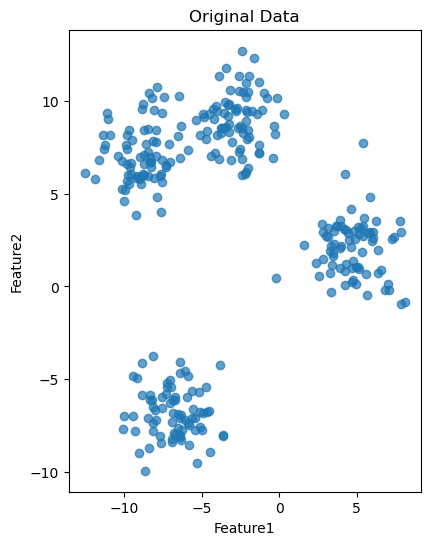

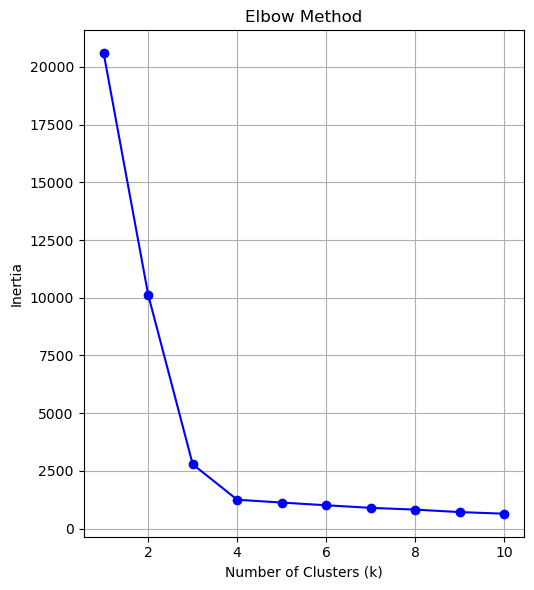

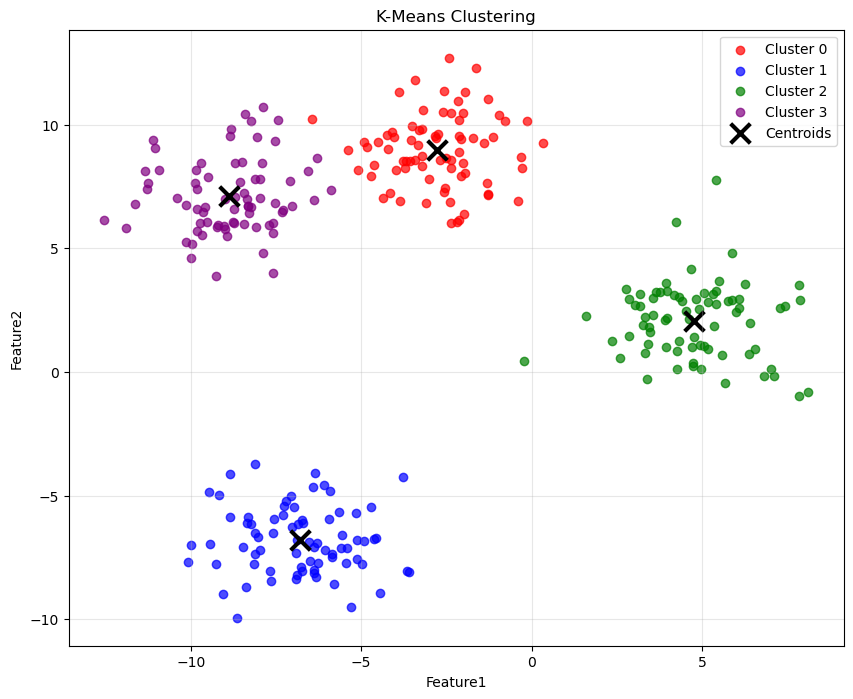

Silhouette Score: 0.691

First 10 rows with cluster assignments:
    Feature1  Feature2  Cluster
0  -9.527369  6.048756        3
1 -10.128948  6.746690        3
2  -1.275380  7.183021        0
3  -7.206149 -5.231944        1
4 -11.895515  5.811393        3
5  -5.593138 -7.120017        1
6   4.899650  2.551146        2
7  -6.260230 -7.725696        1
8  -3.227959  8.735798        0
9   2.852924  2.958000        2

Number of points in each cluster:
Cluster
0    76
1    75
2    75
3    74
Name: count, dtype: int64


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
import os
import warnings

os.environ['OMP_NUM_THREADS'] = '1'
warnings.filterwarnings('ignore')

def load_data():
    X, _ = make_blobs(n_samples=300, centers=4, n_features=2, 
                      random_state=42, cluster_std=1.5)
    df = pd.DataFrame(X, columns=['Feature1', 'Feature2'])
    return df

def visualize_data(df):
    plt.figure(figsize=(10, 6))
    plt.subplot(1, 2, 1)
    plt.scatter(df['Feature1'], df['Feature2'], alpha=0.7)
    plt.title('Original Data')
    plt.xlabel('Feature1')
    plt.ylabel('Feature2')

def apply_pca(df, n_components=2):
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(df)
    pca = PCA(n_components=n_components)
    pca_data = pca.fit_transform(scaled_data)
    return pca_data, pca

def elbow_method(data, max_k=10):
    inertias = []
    k_range = range(1, max_k + 1)
    
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10, max_iter=300)
        kmeans.fit(data)
        inertias.append(kmeans.inertia_)
    
    plt.figure(figsize=(10, 6))
    plt.subplot(1, 2, 2)
    plt.plot(k_range, inertias, 'bo-')
    plt.title('Elbow Method')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Inertia')
    plt.grid(True)
    
    return inertias

def perform_kmeans(data, n_clusters=4):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10, max_iter=300)
    cluster_labels = kmeans.fit_predict(data)
    return kmeans, cluster_labels

def visualize_clusters(data, labels, centers, title="K-Means Clustering"):
    plt.figure(figsize=(10, 8))
    colors = ['red', 'blue', 'green', 'purple', 'orange', 'brown', 'pink', 'gray']
    
    for i in range(len(np.unique(labels))):
        cluster_data = data[labels == i]
        plt.scatter(cluster_data[:, 0], cluster_data[:, 1], 
                   c=colors[i], label=f'Cluster {i}', alpha=0.7)
    
    plt.scatter(centers[:, 0], centers[:, 1], c='black', 
               marker='x', s=200, linewidths=3, label='Centroids')
    plt.title(title)
    plt.xlabel('Feature1')
    plt.ylabel('Feature2')
    plt.legend()
    plt.grid(True, alpha=0.3)

def evaluate_clustering(data, labels):
    silhouette_avg = silhouette_score(data, labels)
    return silhouette_avg

def main():
    df = load_data()
    
    visualize_data(df)
    
    data = df.values
    
    inertias = elbow_method(data)
    
    plt.tight_layout()
    plt.show()
    
    optimal_k = 4
    kmeans, cluster_labels = perform_kmeans(data, optimal_k)
    
    visualize_clusters(data, cluster_labels, kmeans.cluster_centers_)
    plt.show()
    
    silhouette_avg = evaluate_clustering(data, cluster_labels)
    print(f"Silhouette Score: {silhouette_avg:.3f}")
    
    results_df = df.copy()
    results_df['Cluster'] = cluster_labels
    print("\nFirst 10 rows with cluster assignments:")
    print(results_df.head(10))
    
    print(f"\nNumber of points in each cluster:")
    print(results_df['Cluster'].value_counts().sort_index())
    
    return results_df, kmeans

if __name__ == "__main__":
    results, model = main()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
import os
import warnings

os.environ['OMP_NUM_THREADS'] = '1'
warnings.filterwarnings('ignore')

def load_data():
    try:
        df = pd.read_csv('Mall_Customers.csv')
        return df
    except FileNotFoundError:
        print("Mall_Customers.csv not found. Using synthetic data for demonstration.")
        X, _ = make_blobs(n_samples=200, centers=5, n_features=2, 
                          random_state=42, cluster_std=1.5)
        df = pd.DataFrame(X, columns=['Annual Income (k$)', 'Spending Score (1-100)'])
        return df

def visualize_data(df):
    plt.figure(figsize=(10, 6))
    plt.subplot(1, 2, 1)
    if 'Annual Income (k$)' in df.columns and 'Spending Score (1-100)' in df.columns:
        plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], alpha=0.7)
        plt.xlabel('Annual Income (k$)')
        plt.ylabel('Spending Score (1-100)')
    else:
        plt.scatter(df.iloc[:, 0], df.iloc[:, 1], alpha=0.7)
        plt.xlabel(df.columns[0])
        plt.ylabel(df.columns[1])
    plt.title('Original Data')
    plt.grid(True, alpha=0.3)

def apply_pca(df, n_components=2):
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(df)
    pca = PCA(n_components=n_components)
    pca_data = pca.fit_transform(scaled_data)
    return pca_data, pca

def elbow_method(data, max_k=10):
    inertias = []
    k_range = range(1, max_k + 1)
    
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10, max_iter=300)
        kmeans.fit(data)
        inertias.append(kmeans.inertia_)
    
    plt.figure(figsize=(10, 6))
    plt.subplot(1, 2, 2)
    plt.plot(k_range, inertias, 'bo-')
    plt.title('Elbow Method')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Inertia')
    plt.grid(True)
    
    return inertias

def perform_kmeans(data, n_clusters=4):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10, max_iter=300)
    cluster_labels = kmeans.fit_predict(data)
    return kmeans, cluster_labels

def visualize_clusters(data, labels, centers, title="K-Means Clustering"):
    plt.figure(figsize=(10, 8))
    colors = ['red', 'blue', 'green', 'purple', 'orange', 'brown', 'pink', 'gray']
    
    for i in range(len(np.unique(labels))):
        cluster_data = data[labels == i]
        plt.scatter(cluster_data[:, 0], cluster_data[:, 1], 
                   c=colors[i], label=f'Cluster {i}', alpha=0.7)
    
    plt.scatter(centers[:, 0], centers[:, 1], c='black', 
               marker='x', s=200, linewidths=3, label='Centroids')
    plt.title(title)
    plt.xlabel('Annual Income (k$)')
    plt.ylabel('Spending Score (1-100)')
    plt.legend()
    plt.grid(True, alpha=0.3)

def evaluate_clustering(data, labels):
    silhouette_avg = silhouette_score(data, labels)
    return silhouette_avg

def main():
    df = load_data()
    
    if 'Annual Income (k$)' in df.columns and 'Spending Score (1-100)' in df.columns:
        data = df[['Annual Income (k$)', 'Spending Score (1-100)']].values
    else:
        data = df.iloc[:, -2:].values
    
    visualize_data(pd.DataFrame(data, columns=['Income', 'Spending']))
    
    inertias = elbow_method(data)
    
    plt.tight_layout()
    plt.show()
    
    optimal_k = 5
    kmeans, cluster_labels = perform_kmeans(data, optimal_k)
    
    visualize_clusters(data, cluster_labels, kmeans.cluster_centers_)
    plt.show()
    
    silhouette_avg = evaluate_clustering(data, cluster_labels)
    print(f"Silhouette Score: {silhouette_avg:.3f}")
    
    results_df = df.copy()
    results_df['Cluster'] = cluster_labels
    print("\nFirst 10 rows with cluster assignments:")
    print(results_df.head(10))
    
    print(f"\nNumber of points in each cluster:")
    print(pd.Series(cluster_labels).value_counts().sort_index())
    
    return results_df, kmeans

if __name__ == "__main__":
    results, model = main()